In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from upsetplot import plot

import upsetplot
from upsetplot import generate_data, plot
from upsetplot import UpSet
from upsetplot import from_contents

from matplotlib import cm

In [2]:
projdir = '/u/home/t/terencew/project-cluo/igvf/pilot/multiome'
donors = np.loadtxt(f'{projdir}/txt/donors.txt', dtype=str)
samples = np.loadtxt(f'{projdir}/txt/samples.txt', dtype=str)
s = samples[0]

In [3]:
gex = pd.read_csv(f'{projdir}/csv/demux/status_gex.csv', sep='\t', header=0,
                          index_col=0)
atac = pd.read_csv(f'{projdir}/csv/demux/status_atac.csv', sep='\t', header=0,
                           index_col=0)

In [4]:
tmp_gex = gex.copy()
tmp_gex.columns = [f'rna_{x}' for x in gex.columns]
tmp_atac = atac.copy()
tmp_atac.columns = [f'atac_{x}' for x in atac.columns]
final_igvf = pd.concat([tmp_gex, tmp_atac], axis=1)
final_igvf.drop(columns=['rna_demuxalot', 'atac_scavengers'], inplace=True)

In [5]:
singlet_gex = pd.read_csv(f'{projdir}/csv/demux/singlet_gex.csv', sep='\t', header=0,
                          index_col=0)
singlet_atac = pd.read_csv(f'{projdir}/csv/demux/singlet_atac.csv', sep='\t', header=0,
                           index_col=0)

In [6]:
tmp_singlet_gex = singlet_gex.copy()
tmp_singlet_gex.columns = [f'rna_{x}' for x in singlet_gex.columns]
tmp_singlet_atac = singlet_atac.copy()
tmp_singlet_atac.columns = [f'atac_{x}' for x in singlet_atac.columns]
final_singlet_igvf = pd.concat([tmp_singlet_gex, tmp_singlet_atac], axis=1)
final_singlet_igvf.drop(columns=['rna_demuxalot', 'atac_scavengers'], inplace=True)

In [7]:
final_singlet_igvf.columns = ['RNA demuxlet', 'ATAC demuxlet',
        'RNA freemuxlet', 'ATAC freemuxlet',
        'RNA vireo', 'ATAC vireo',
        'RNA vireo_nogenos', 'ATAC vireo_nogenos',
        'RNA scsplit', 'ATAC scsplit',
        'RNA scsplit_nogenos', 'ATAC scsplit_nogenos',
        'RNA souporcell', 'ATAC souporcell',
       'RNA souporcell_nogenos', 'ATAC souporcell_nogenos']

In [8]:
final_singlet_igvf['majority'] = final_igvf.mode(axis=1)[0]

In [9]:
final_singlet_igvf['majority'].value_counts()

donor1         9336
donor4         5983
donor3         5479
non_singlet    5060
donor2         4639
Name: majority, dtype: int64

In [10]:
final_singlet_igvf.to_csv(f'{projdir}/csv/final_figures/figure4/igvf_joint_upset.csv',
                          sep='\t', header=True, index=True)

In [11]:
# # upset = final_singlet.groupby(cols).size()

# cols = ['gex_demuxlet', 'atac_demuxlet',
#         'gex_freemuxlet', 'atac_freemuxlet',
#         'gex_vireo', 'atac_vireo',
#         'gex_vireo_nogenos', 'atac_vireo_nogenos',
#         'gex_souporcell', 'atac_souporcell',
#        'gex_souporcell_nogenos', 'atac_souporcell_nogenos']

# # cols = final_singlet.columns
# upset = final_singlet.groupby(cols).size()
# d = plot(upset, sort_by='cardinality', min_subset_size=300, show_counts=False)

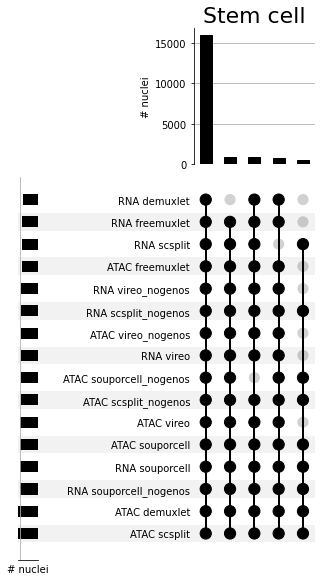

In [12]:
cols = ['RNA demuxlet', 'ATAC demuxlet',
        'RNA freemuxlet', 'ATAC freemuxlet',
        'RNA vireo', 'ATAC vireo',
        'RNA vireo_nogenos', 'ATAC vireo_nogenos',
        'RNA scsplit', 'ATAC scsplit',
        'RNA scsplit_nogenos', 'ATAC scsplit_nogenos',
        'RNA souporcell', 'ATAC souporcell',
       'RNA souporcell_nogenos', 'ATAC souporcell_nogenos']

upset = final_singlet_igvf.groupby(cols).size()
d = plot(upset, sort_by='cardinality', totals_plot_elements = 1,
         min_subset_size=500, show_counts=False)
# d = plot(upset, sort_by='cardinality',
#          min_subset_size=300, show_counts=False)
plt.title('Stem cell', size=22)
d['intersections'].set_ylabel('# nuclei')
d['totals'].set_xlabel('# nuclei')
d['totals'].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [13]:
d['totals']

<AxesSubplot:xlabel='# nuclei'>

In [14]:
TITANIC_URL = (
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"  # noqa
)
df = pd.read_csv(TITANIC_URL)

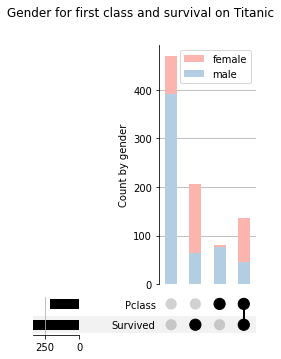

In [15]:
df = df.set_index(df.Survived == 1).set_index(df.Pclass == 1, append=True)

upset = UpSet(df, intersection_plot_elements=0)  # disable the default bar chart
upset.add_stacked_bars(
    by="Sex", colors=cm.Pastel1, title="Count by gender", elements=10
)
upset.plot()
plt.suptitle("Gender for first class and survival on Titanic")
plt.show()

In [16]:
df

PassengerId  Survived  Pclass  \
Survived Pclass                                  
False    False             1         0       3   
True     True              2         1       1   
         False             3         1       3   
         True              4         1       1   
False    False             5         0       3   
...                      ...       ...     ...   
         False           887         0       2   
True     True            888         1       1   
False    False           889         0       3   
True     True            890         1       1   
False    False           891         0       3   

                                                              Name     Sex  \
Survived Pclass                                                              
False    False                             Braund, Mr. Owen Harris    male   
True     True    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
         False                              Heikkinen, Miss. Laina  female   
         True         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
False    False                            Allen, Mr. William Henry    male   
...                                                            ...     ...   
         False                               Montvila, Rev. Juozas    male   
True     True                         Graham, Miss. Margaret Edith  female   
False    False            Johnston, Miss. Catherine Helen "Carrie"  female   
True     True                                Behr, Mr. Karl Howell    male   
False    False                                 Dooley, Mr. Patrick    male   

                  Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
Survived Pclass                                                                
False    False   22.0      1      0         A/5 21171   7.2500   NaN        S  
True     True    38.0      1      0          PC 17599  71.2833   C85        C  
         False   26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
         True    35.0      1      0            113803  53.1000  C123        S  
False    False   35.0      0      0            373450   8.0500   NaN        S  
...               ...    ...    ...               ...      ...   ...      ...  
         False   27.0      0      0            211536  13.0000   NaN        S  
True     True    19.0      0      0            112053  30.0000   B42        S  
False    False    NaN      1      2        W./C. 6607  23.4500   NaN        S  
True     True    26.0      0      0            111369  30.0000  C148        C  
False    False   32.0      0      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [17]:
# UpSet(upset, sort_by='cardinality', totals_plot_elements = 1,
#          min_subset_size=300, show_counts=False)

### adelus

In [32]:
adelus_dir = '/u/home/t/terencew/project-cluo/demux_benchmark/adelus_2023/'

In [50]:
gex = pd.read_csv(f'{adelus_dir}/csv/demux/inter_gex.csv', sep='\t', header=0,
                          index_col=0)
atac = pd.read_csv(f'{adelus_dir}/csv/demux/inter_atac.csv', sep='\t', header=0,
                           index_col=0)

In [51]:
gex.replace({'doublet' : 'non_singlet', 
            'unassigned' : 'non_singlet'}, inplace=True)
atac.replace({'doublet' : 'non_singlet', 
            'unassigned' : 'non_singlet'}, inplace=True)

In [52]:
tmp_gex = gex.copy()
tmp_gex.columns = [f'rna_{x}' for x in gex.columns]
tmp_atac = atac.copy()
tmp_atac.columns = [f'atac_{x}' for x in atac.columns]
final_adelus = pd.concat([tmp_gex, tmp_atac], axis=1)
final_adelus.drop(columns=['rna_demuxalot', 'atac_scavengers'], inplace=True)
final_adelus['majority'] = final_adelus.mode(axis=1)[0]

In [53]:
singlet_gex = pd.read_csv(f'{adelus_dir}/csv/demux/singlet_gex.csv', sep='\t', header=0,
                          index_col=0)
singlet_atac = pd.read_csv(f'{adelus_dir}/csv/demux/singlet_atac.csv', sep='\t', header=0,
                           index_col=0)

singlet_gex['sample'] = [x.split('_')[1] for x in singlet_gex.index]
singlet_atac['sample'] = [x.split('_')[1] for x in singlet_atac.index]

singlet_gex = singlet_gex[singlet_gex['sample'] != '20220928-IGVF-D7']
singlet_atac = singlet_atac[singlet_atac['sample'] != '20220928-IGVF-D7']

### forgot to add to original script
# singlet_gex.rename(columns={'known_souporcell' : 'souporcell', 'souporcell' : 'souporcell_nogenos'}, inplace=True)
# singlet_atac.rename(columns={'known_souporcell' : 'souporcell', 'souporcell' : 'souporcell_nogenos'}, inplace=True)
singlet_gex.drop(columns=['sample'], inplace=True)
singlet_atac.drop(columns=['sample'], inplace=True)

In [54]:
singlet_gex

,demuxlet,freemuxlet,vireo,vireo_nogenos,souporcell,souporcell_nogenos,demuxalot,scsplit,scsplit_nogenos
AAACAGCCAACTAGCC-1_ctrl6h,1,1,1,1,1,1,1,1,1
AAACAGCCACACAATT-1_ctrl6h,1,1,1,1,1,1,1,1,1
AAACAGCCACTCGCTC-1_ctrl6h,1,1,1,1,1,1,1,0,1
AAACCAACAGAACCGA-1_ctrl6h,1,1,1,1,1,1,0,1,1
AAACCGAAGCTATGAC-1_ctrl6h,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGGGATTT-1_pooled_endMT_5,1,1,1,1,1,1,1,1,1
TTTGTGTTCGTTATAG-1_pooled_endMT_5,0,1,1,1,1,1,1,1,1
TTTGTTGGTCCCGAAG-1_pooled_endMT_5,0,1,0,1,1,1,1,1,1
TTTGTTGGTGAGACTC-1_pooled_endMT_5,1,1,1,1,1,1,1,1,1


In [55]:
tmp_singlet_gex = singlet_gex.copy()
tmp_singlet_gex.columns = [f'rna_{x}' for x in singlet_gex.columns]
tmp_singlet_atac = singlet_atac.copy()
tmp_singlet_atac.columns = [f'atac_{x}' for x in singlet_atac.columns]
final_singlet_adelus = pd.concat([tmp_singlet_gex, tmp_singlet_atac], axis=1)
final_singlet_adelus.drop(columns=['rna_demuxalot', 'atac_scavengers'], inplace=True)

In [56]:
final_singlet_adelus.shape

(35201, 16)

In [57]:
final_singlet_adelus.columns = ['RNA demuxlet', 'ATAC demuxlet',
        'RNA freemuxlet', 'ATAC freemuxlet',
        'RNA vireo', 'ATAC vireo',
        'RNA vireo_nogenos', 'ATAC vireo_nogenos',
        'RNA scsplit', 'ATAC scsplit',
        'RNA scsplit_nogenos', 'ATAC scsplit_nogenos',
        'RNA souporcell', 'ATAC souporcell',
       'RNA souporcell_nogenos', 'ATAC souporcell_nogenos']

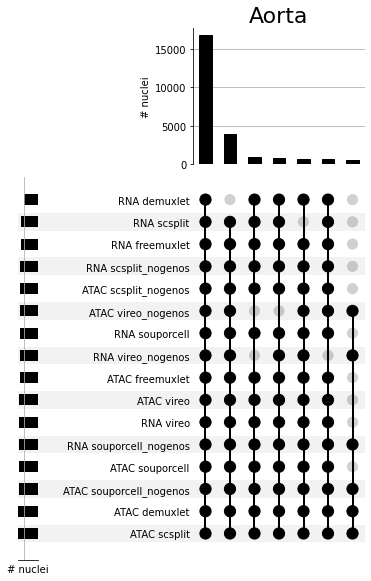

In [24]:
cols = ['RNA demuxlet', 'ATAC demuxlet',
        'RNA freemuxlet', 'ATAC freemuxlet',
        'RNA vireo', 'ATAC vireo',
        'RNA vireo_nogenos', 'ATAC vireo_nogenos',
        'RNA scsplit', 'ATAC scsplit',
        'RNA scsplit_nogenos', 'ATAC scsplit_nogenos',
        'RNA souporcell', 'ATAC souporcell',
       'RNA souporcell_nogenos', 'ATAC souporcell_nogenos']

upset = final_singlet_adelus.groupby(cols).size()
d = plot(upset, sort_by='cardinality', totals_plot_elements = 1,
         min_subset_size=500, show_counts=False)
# d = plot(upset, sort_by='cardinality',
#          min_subset_size=300, show_counts=False)
plt.title('Aorta', size=22)
d['intersections'].set_ylabel('# nuclei')
d['totals'].set_xlabel('# nuclei')
d['totals'].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

In [58]:
final_singlet_adelus['majority'] = final_adelus['majority']

In [59]:
final_singlet_adelus.to_csv(f'{projdir}/csv/final_figures/figure4/adelus_joint_upset.csv',
                          sep='\t', header=True, index=True)